In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import plotly.express as px
import seaborn as sns
import matplotlib as cm

In [2]:
# Import data
all_data_csv = Path("Resources/all_data.csv")

#Reading data
all_data = pd.read_csv(all_data_csv,encoding='utf-8')

In [3]:
# Updating the population data from dtype object to dtype numerical
all_data["Population (2023)"] = pd.to_numeric(all_data["Population (2023)"].str.replace(',',''), errors='coerce')

In [4]:
all_data = all_data.sort_values(by=["Population (2023)"])

In [5]:
# Creating bins and names to hold the data
bins = [0, 1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 50_000_000, 100_000_000, 1_000_000_000, 1_500_000_000]

group_names = ["Below 1 Million","1M-5M","5-10M","10-15M", "15-20M", "20-50M", "50-100M", "100M-1B","Above 1 Billion"]

In [6]:
# Slice data and place into bins
all_data["Population Range"] = pd.cut(all_data["Population (2023)"],
                                       bins, labels = group_names,
                                       include_lowest= True, ordered= True)

all_data.head()


,Unnamed: 0,Flag,Country,Score,Torrents Restricted?,Torrents Banned or Shut Down?,Pornography Restricted?,Pornography Banned?,Political Media Restricted?,Political Media Heavily Censored?,Social Media Restricted?,Social Media Banned?,VPNs Restricted,VPNs Banned?,Messaging and VoIP App Restrictions,Population (2023),4.1.4) Level of web accessibility,4.2.1) Privacy regulations,Population Range
90,90,:li:,Liechtenstein,1,Y,N,N,N,N,N,N,N,N,N,N,39584,NaN,NaN,Below 1 Million
3,3,:ad:,Andorra,1,Y,N,N,N,N,N,N,N,N,N,N,80088,NaN,NaN,Below 1 Million
136,136,:sc:,Seychelles,1,Y,N,N,N,N,N,N,N,N,N,N,107660,NaN,NaN,Below 1 Million
158,158,:to:,Tonga,2,Y,N,N,N,Y,N,N,N,N,N,N,107773,NaN,NaN,Below 1 Million
132,132,:ws:,Samoa,2,Y,N,N,N,Y,N,N,N,N,N,N,225681,NaN,NaN,Below 1 Million


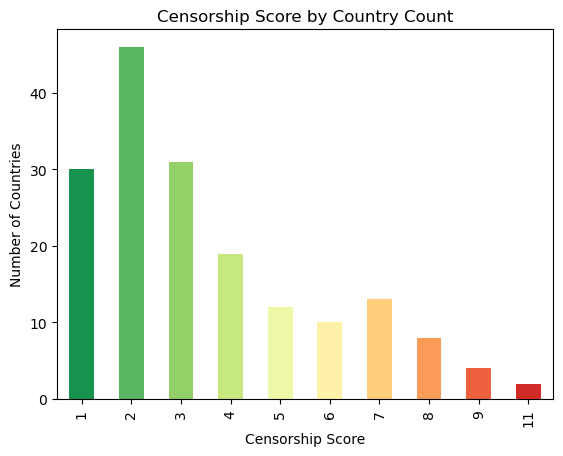

In [7]:
# Bar Chart of Censorship Score and Number of Countries
# 1 is least censored and 11 is most censored
# Country Score Counts
score_counts = all_data["Score"].value_counts().sort_index()

# Creating scaled color palette
colors = list(reversed(sns.color_palette("RdYlGn", len(score_counts))))


# Bar Graph
score_counts.plot(kind='bar', color=colors)
plt.xlabel('Censorship Score')
plt.ylabel('Number of Countries')
plt.title('Censorship Score by Country Count')
plt.show()


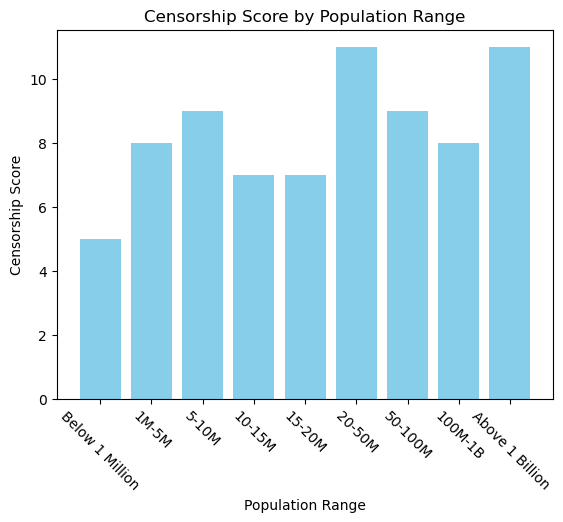

In [8]:
# Bar Chart of Censorship Score and Country Population 
# 1 is least censored and 11 is most censored
plt.bar(all_data["Population Range"], all_data["Score"], color="skyblue")
plt.xlabel("Population Range")
plt.xticks(rotation=315)
plt.ylabel("Censorship Score")
plt.title('Censorship Score by Population Range')
plt.show()

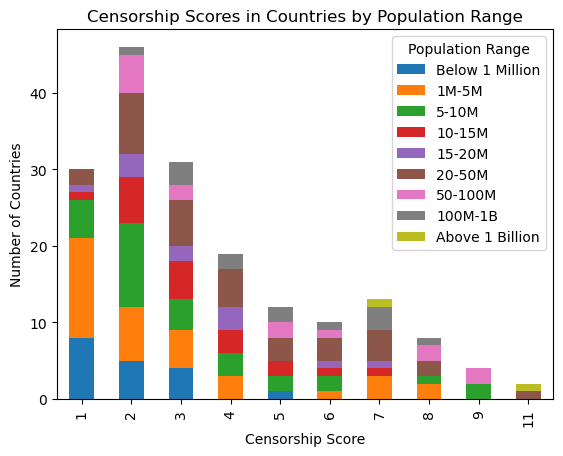

In [9]:
# Bar Chart of Censorship Score by Countries and Country Population 
# 1 is least censored and 11 is most censored
score_pop = all_data.groupby(["Score", "Population Range"]).size().unstack(fill_value=0)
score_pop.plot(kind='bar',stacked= True)
plt.xlabel("Censorship Score")
plt.ylabel("Number of Countries")
plt.title('Censorship Scores in Countries by Population Range')
plt.show()

The r-squared is: 0.10052119235685054


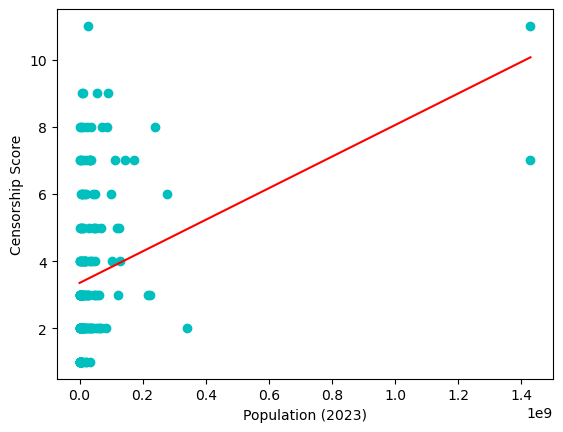

In [10]:
# Correlation between population and level of censorship 
# 1 is least censored and 11 is most censored
x_values = all_data["Population (2023)"]
y_values = all_data["Score"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="c")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Population (2023)")
plt.ylabel("Censorship Score")
print(f"The r-squared is: {rvalue**2}")
plt.show()